## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import energyefficiencyDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              1040.
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:20:35   Log-Likelihood:                         -85.258
No. Observations:                 614   AIC:                                      184.5
Df Residuals:                     607   BIC:                                      215.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

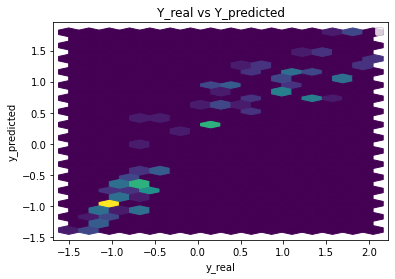

Performance Metrics
Mean Squared Error: 0.11109984404559854
Mean Absolute Error: 0.23762688755041778
Manhattan distance: 36.594540682764354
Euclidean distance: 4.136348145770877


Stats Model MAE 0.23762688755041778


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.037906
0:	learn: 0.9722611	total: 51.9ms	remaining: 51.9s
1:	learn: 0.9396533	total: 52.3ms	remaining: 26.1s
2:	learn: 0.9118578	total: 52.7ms	remaining: 17.5s
3:	learn: 0.8809416	total: 53.2ms	remaining: 13.2s
4:	learn: 0.8557441	total: 54.1ms	remaining: 10.8s
5:	learn: 0.8272184	total: 54.4ms	remaining: 9.01s
6:	learn: 0.8043291	total: 54.5ms	remaining: 7.73s
7:	learn: 0.7790799	total: 54.7ms	remaining: 6.79s
8:	learn: 0.7535251	total: 55.5ms	remaining: 6.12s
9:	learn: 0.7298589	total: 55.8ms	remaining: 5.52s
10:	learn: 0.7069914	total: 56ms	remaining: 5.04s
11:	learn: 0.6852323	total: 56.3ms	remaining: 4.63s
12:	learn: 0.6646954	total: 56.5ms	remaining: 4.29s
13:	learn: 0.6443843	total: 56.7ms	remaining: 3.99s
14:	learn: 0.6243801	total: 57ms	remaining: 3.74s
15:	learn: 0.6048916	total: 57.3ms	remaining: 3.52s
16:	learn: 0.5891967	total: 57.5ms	remaining: 3.32s
17:	learn: 0.5731714	total: 57.6ms	remaining: 3.14s
18:	learn: 0.5553646	total: 62.6ms	remaining: 3.

57:	learn: 0.1922597	total: 89.9ms	remaining: 1.46s
58:	learn: 0.1873187	total: 91.2ms	remaining: 1.45s
59:	learn: 0.1822965	total: 92.2ms	remaining: 1.44s
60:	learn: 0.1783683	total: 92.7ms	remaining: 1.43s
61:	learn: 0.1749641	total: 93.1ms	remaining: 1.41s
62:	learn: 0.1705272	total: 93.7ms	remaining: 1.39s
63:	learn: 0.1667738	total: 94ms	remaining: 1.38s
64:	learn: 0.1625970	total: 94.6ms	remaining: 1.36s
65:	learn: 0.1595495	total: 95ms	remaining: 1.34s
66:	learn: 0.1556765	total: 95.3ms	remaining: 1.33s
67:	learn: 0.1514668	total: 95.6ms	remaining: 1.31s
68:	learn: 0.1484658	total: 95.9ms	remaining: 1.29s
69:	learn: 0.1449739	total: 96.6ms	remaining: 1.28s
70:	learn: 0.1420978	total: 97.1ms	remaining: 1.27s
71:	learn: 0.1402149	total: 97.3ms	remaining: 1.25s
72:	learn: 0.1381903	total: 97.6ms	remaining: 1.24s
73:	learn: 0.1352436	total: 98.1ms	remaining: 1.23s
74:	learn: 0.1326435	total: 98.6ms	remaining: 1.22s
75:	learn: 0.1299320	total: 99.1ms	remaining: 1.21s
76:	learn: 0.126

103:	learn: 0.0802267	total: 114ms	remaining: 982ms
104:	learn: 0.0790023	total: 115ms	remaining: 978ms
105:	learn: 0.0775834	total: 115ms	remaining: 971ms
106:	learn: 0.0768400	total: 116ms	remaining: 969ms
107:	learn: 0.0759219	total: 117ms	remaining: 964ms
108:	learn: 0.0746552	total: 117ms	remaining: 960ms
109:	learn: 0.0735544	total: 118ms	remaining: 955ms
110:	learn: 0.0725488	total: 119ms	remaining: 950ms
111:	learn: 0.0714080	total: 119ms	remaining: 945ms
112:	learn: 0.0703432	total: 120ms	remaining: 938ms
113:	learn: 0.0693212	total: 120ms	remaining: 931ms
114:	learn: 0.0686593	total: 120ms	remaining: 924ms
115:	learn: 0.0677769	total: 120ms	remaining: 918ms
116:	learn: 0.0670287	total: 121ms	remaining: 911ms
117:	learn: 0.0664583	total: 121ms	remaining: 904ms
118:	learn: 0.0657559	total: 122ms	remaining: 903ms
119:	learn: 0.0649917	total: 123ms	remaining: 899ms
120:	learn: 0.0645381	total: 123ms	remaining: 894ms
121:	learn: 0.0637160	total: 124ms	remaining: 889ms
122:	learn: 

169:	learn: 0.0474439	total: 149ms	remaining: 726ms
170:	learn: 0.0472730	total: 149ms	remaining: 723ms
171:	learn: 0.0471098	total: 150ms	remaining: 724ms
172:	learn: 0.0468532	total: 151ms	remaining: 722ms
173:	learn: 0.0465955	total: 152ms	remaining: 719ms
174:	learn: 0.0463286	total: 153ms	remaining: 719ms
175:	learn: 0.0461331	total: 153ms	remaining: 716ms
176:	learn: 0.0459846	total: 154ms	remaining: 714ms
177:	learn: 0.0458341	total: 154ms	remaining: 712ms
178:	learn: 0.0457087	total: 155ms	remaining: 710ms
179:	learn: 0.0454886	total: 155ms	remaining: 707ms
180:	learn: 0.0453269	total: 156ms	remaining: 705ms
181:	learn: 0.0451043	total: 156ms	remaining: 703ms
182:	learn: 0.0449678	total: 157ms	remaining: 700ms
183:	learn: 0.0448135	total: 157ms	remaining: 698ms
184:	learn: 0.0446226	total: 158ms	remaining: 696ms
185:	learn: 0.0444250	total: 159ms	remaining: 694ms
186:	learn: 0.0442385	total: 159ms	remaining: 692ms
187:	learn: 0.0440691	total: 160ms	remaining: 689ms
188:	learn: 

350:	learn: 0.0277607	total: 238ms	remaining: 440ms
351:	learn: 0.0277269	total: 239ms	remaining: 440ms
352:	learn: 0.0276881	total: 239ms	remaining: 438ms
353:	learn: 0.0276542	total: 239ms	remaining: 437ms
354:	learn: 0.0276178	total: 240ms	remaining: 436ms
355:	learn: 0.0275347	total: 247ms	remaining: 446ms
356:	learn: 0.0274916	total: 247ms	remaining: 446ms
357:	learn: 0.0274438	total: 248ms	remaining: 445ms
358:	learn: 0.0273964	total: 249ms	remaining: 445ms
359:	learn: 0.0273480	total: 251ms	remaining: 446ms
360:	learn: 0.0272957	total: 251ms	remaining: 445ms
361:	learn: 0.0272694	total: 252ms	remaining: 444ms
362:	learn: 0.0272195	total: 253ms	remaining: 443ms
363:	learn: 0.0271633	total: 253ms	remaining: 443ms
364:	learn: 0.0270922	total: 254ms	remaining: 442ms
365:	learn: 0.0270129	total: 255ms	remaining: 441ms
366:	learn: 0.0269823	total: 256ms	remaining: 441ms
367:	learn: 0.0269144	total: 257ms	remaining: 441ms
368:	learn: 0.0268383	total: 257ms	remaining: 439ms
369:	learn: 

377:	learn: 0.0263822	total: 262ms	remaining: 431ms
378:	learn: 0.0263524	total: 262ms	remaining: 430ms
379:	learn: 0.0263140	total: 265ms	remaining: 432ms
380:	learn: 0.0262657	total: 265ms	remaining: 431ms
381:	learn: 0.0262334	total: 266ms	remaining: 430ms
382:	learn: 0.0262069	total: 267ms	remaining: 429ms
383:	learn: 0.0261914	total: 267ms	remaining: 429ms
384:	learn: 0.0261201	total: 268ms	remaining: 428ms
385:	learn: 0.0260695	total: 268ms	remaining: 427ms
386:	learn: 0.0260066	total: 269ms	remaining: 426ms
387:	learn: 0.0259626	total: 269ms	remaining: 425ms
388:	learn: 0.0259314	total: 269ms	remaining: 423ms
389:	learn: 0.0259005	total: 270ms	remaining: 422ms
390:	learn: 0.0258374	total: 270ms	remaining: 421ms
391:	learn: 0.0258035	total: 270ms	remaining: 419ms
392:	learn: 0.0257770	total: 271ms	remaining: 418ms
393:	learn: 0.0257083	total: 271ms	remaining: 417ms
394:	learn: 0.0256809	total: 271ms	remaining: 415ms
395:	learn: 0.0256536	total: 271ms	remaining: 414ms
396:	learn: 

453:	learn: 0.0234986	total: 296ms	remaining: 355ms
454:	learn: 0.0234760	total: 296ms	remaining: 354ms
455:	learn: 0.0234457	total: 297ms	remaining: 354ms
456:	learn: 0.0234248	total: 298ms	remaining: 354ms
457:	learn: 0.0233956	total: 298ms	remaining: 353ms
458:	learn: 0.0233521	total: 299ms	remaining: 352ms
459:	learn: 0.0233304	total: 299ms	remaining: 351ms
460:	learn: 0.0233016	total: 299ms	remaining: 350ms
461:	learn: 0.0232821	total: 299ms	remaining: 349ms
462:	learn: 0.0232622	total: 300ms	remaining: 348ms
463:	learn: 0.0232422	total: 300ms	remaining: 347ms
464:	learn: 0.0232204	total: 301ms	remaining: 346ms
465:	learn: 0.0232067	total: 301ms	remaining: 345ms
466:	learn: 0.0231776	total: 301ms	remaining: 344ms
467:	learn: 0.0231508	total: 301ms	remaining: 343ms
468:	learn: 0.0231180	total: 302ms	remaining: 342ms
469:	learn: 0.0230689	total: 302ms	remaining: 341ms
470:	learn: 0.0230346	total: 303ms	remaining: 340ms
471:	learn: 0.0230038	total: 303ms	remaining: 339ms
472:	learn: 

598:	learn: 0.0196643	total: 383ms	remaining: 256ms
599:	learn: 0.0196464	total: 383ms	remaining: 256ms
600:	learn: 0.0196180	total: 386ms	remaining: 256ms
601:	learn: 0.0195800	total: 386ms	remaining: 255ms
602:	learn: 0.0195477	total: 387ms	remaining: 255ms
603:	learn: 0.0195293	total: 387ms	remaining: 254ms
604:	learn: 0.0194933	total: 395ms	remaining: 258ms
605:	learn: 0.0194768	total: 396ms	remaining: 257ms
606:	learn: 0.0194660	total: 406ms	remaining: 263ms
607:	learn: 0.0194474	total: 407ms	remaining: 262ms
608:	learn: 0.0194225	total: 414ms	remaining: 266ms
609:	learn: 0.0194148	total: 414ms	remaining: 265ms
610:	learn: 0.0193842	total: 423ms	remaining: 269ms
611:	learn: 0.0193649	total: 424ms	remaining: 269ms
612:	learn: 0.0193359	total: 424ms	remaining: 268ms
613:	learn: 0.0193156	total: 425ms	remaining: 267ms
614:	learn: 0.0192823	total: 425ms	remaining: 266ms
615:	learn: 0.0192661	total: 425ms	remaining: 265ms
616:	learn: 0.0192523	total: 426ms	remaining: 264ms
617:	learn: 

765:	learn: 0.0165055	total: 488ms	remaining: 149ms
766:	learn: 0.0164809	total: 490ms	remaining: 149ms
767:	learn: 0.0164659	total: 491ms	remaining: 148ms
768:	learn: 0.0164306	total: 491ms	remaining: 147ms
769:	learn: 0.0164089	total: 491ms	remaining: 147ms
770:	learn: 0.0163882	total: 491ms	remaining: 146ms
771:	learn: 0.0163759	total: 492ms	remaining: 145ms
772:	learn: 0.0163559	total: 492ms	remaining: 145ms
773:	learn: 0.0163418	total: 493ms	remaining: 144ms
774:	learn: 0.0163324	total: 493ms	remaining: 143ms
775:	learn: 0.0163215	total: 493ms	remaining: 142ms
776:	learn: 0.0163155	total: 494ms	remaining: 142ms
777:	learn: 0.0163036	total: 494ms	remaining: 141ms
778:	learn: 0.0162931	total: 494ms	remaining: 140ms
779:	learn: 0.0162850	total: 495ms	remaining: 139ms
780:	learn: 0.0162724	total: 495ms	remaining: 139ms
781:	learn: 0.0162477	total: 496ms	remaining: 138ms
782:	learn: 0.0162364	total: 496ms	remaining: 137ms
783:	learn: 0.0162139	total: 496ms	remaining: 137ms
784:	learn: 

Catboost MAE 0.02391010123693848


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 0.81507 | train_mse: 0.44678 | train_mae: 0.53745 |  0:00:02s


epoch 1  | loss: 0.22533 | train_mse: 0.25089 | train_mae: 0.40542 |  0:00:02s


epoch 2  | loss: 0.2063  | train_mse: 0.1675  | train_mae: 0.31715 |  0:00:03s


epoch 3  | loss: 0.16638 | train_mse: 0.11335 | train_mae: 0.27333 |  0:00:04s


epoch 4  | loss: 0.13564 | train_mse: 0.11384 | train_mae: 0.26314 |  0:00:04s


epoch 5  | loss: 0.12138 | train_mse: 0.10771 | train_mae: 0.24997 |  0:00:05s


epoch 6  | loss: 0.13011 | train_mse: 0.10679 | train_mae: 0.24419 |  0:00:05s


epoch 7  | loss: 0.11722 | train_mse: 0.07095 | train_mae: 0.19922 |  0:00:06s


epoch 8  | loss: 0.10285 | train_mse: 0.071   | train_mae: 0.20276 |  0:00:07s


epoch 9  | loss: 0.09138 | train_mse: 0.06451 | train_mae: 0.18712 |  0:00:07s


epoch 10 | loss: 0.09265 | train_mse: 0.0596  | train_mae: 0.18752 |  0:00:08s


epoch 11 | loss: 0.09176 | train_mse: 0.05829 | train_mae: 0.18671 |  0:00:08s


epoch 12 | loss: 0.09956 | train_mse: 0.04911 | train_mae: 0.16094 |  0:00:09s


epoch 13 | loss: 0.10363 | train_mse: 0.05765 | train_mae: 0.17772 |  0:00:10s


epoch 14 | loss: 0.08565 | train_mse: 0.05196 | train_mae: 0.17    |  0:00:10s


epoch 15 | loss: 0.08056 | train_mse: 0.04336 | train_mae: 0.16206 |  0:00:11s


epoch 16 | loss: 0.08867 | train_mse: 0.03785 | train_mae: 0.14524 |  0:00:11s


epoch 17 | loss: 0.09035 | train_mse: 0.04226 | train_mae: 0.15606 |  0:00:12s


epoch 18 | loss: 0.08441 | train_mse: 0.03823 | train_mae: 0.14996 |  0:00:13s


epoch 19 | loss: 0.07344 | train_mse: 0.03743 | train_mae: 0.15398 |  0:00:13s


epoch 20 | loss: 0.07993 | train_mse: 0.04195 | train_mae: 0.15656 |  0:00:14s


epoch 21 | loss: 0.07143 | train_mse: 0.06649 | train_mae: 0.18612 |  0:00:14s


epoch 22 | loss: 0.07228 | train_mse: 0.02828 | train_mae: 0.13182 |  0:00:15s


epoch 23 | loss: 0.0564  | train_mse: 0.02624 | train_mae: 0.12532 |  0:00:16s


epoch 24 | loss: 0.04488 | train_mse: 0.04169 | train_mae: 0.14778 |  0:00:16s


epoch 25 | loss: 0.05336 | train_mse: 0.03634 | train_mae: 0.14253 |  0:00:17s


epoch 26 | loss: 0.06497 | train_mse: 0.025   | train_mae: 0.11849 |  0:00:18s


epoch 27 | loss: 0.04755 | train_mse: 0.02429 | train_mae: 0.11949 |  0:00:18s


epoch 28 | loss: 0.05513 | train_mse: 0.03221 | train_mae: 0.13105 |  0:00:19s


epoch 29 | loss: 0.06019 | train_mse: 0.03371 | train_mae: 0.14589 |  0:00:20s


epoch 30 | loss: 0.05918 | train_mse: 0.02535 | train_mae: 0.1321  |  0:00:20s


epoch 31 | loss: 0.05231 | train_mse: 0.03733 | train_mae: 0.14036 |  0:00:21s


epoch 32 | loss: 0.06991 | train_mse: 0.02338 | train_mae: 0.11222 |  0:00:21s


epoch 33 | loss: 0.08096 | train_mse: 0.02359 | train_mae: 0.11586 |  0:00:23s


epoch 34 | loss: 0.06117 | train_mse: 0.03614 | train_mae: 0.13754 |  0:00:23s


epoch 35 | loss: 0.08933 | train_mse: 0.0459  | train_mae: 0.15952 |  0:00:24s


epoch 36 | loss: 0.06467 | train_mse: 0.04202 | train_mae: 0.15246 |  0:00:25s


epoch 37 | loss: 0.07324 | train_mse: 0.02951 | train_mae: 0.12712 |  0:00:26s


epoch 38 | loss: 0.07231 | train_mse: 0.03819 | train_mae: 0.14609 |  0:00:26s


epoch 39 | loss: 0.04618 | train_mse: 0.0305  | train_mae: 0.12953 |  0:00:27s


epoch 40 | loss: 0.05197 | train_mse: 0.02278 | train_mae: 0.11718 |  0:00:28s


epoch 41 | loss: 0.0595  | train_mse: 0.01886 | train_mae: 0.10995 |  0:00:29s


epoch 42 | loss: 0.05001 | train_mse: 0.06483 | train_mae: 0.18089 |  0:00:30s


epoch 43 | loss: 0.06419 | train_mse: 0.03024 | train_mae: 0.13996 |  0:00:31s


epoch 44 | loss: 0.06668 | train_mse: 0.04309 | train_mae: 0.15487 |  0:00:32s


epoch 45 | loss: 0.05406 | train_mse: 0.02633 | train_mae: 0.12881 |  0:00:32s


epoch 46 | loss: 0.06748 | train_mse: 0.0306  | train_mae: 0.13708 |  0:00:33s


epoch 47 | loss: 0.05333 | train_mse: 0.0361  | train_mae: 0.14876 |  0:00:33s


epoch 48 | loss: 0.03791 | train_mse: 0.02547 | train_mae: 0.11457 |  0:00:34s


epoch 49 | loss: 0.03917 | train_mse: 0.0166  | train_mae: 0.09558 |  0:00:35s


epoch 50 | loss: 0.05051 | train_mse: 0.0186  | train_mae: 0.10234 |  0:00:35s


epoch 51 | loss: 0.04165 | train_mse: 0.02152 | train_mae: 0.1179  |  0:00:36s


epoch 52 | loss: 0.04412 | train_mse: 0.01603 | train_mae: 0.0936  |  0:00:36s


epoch 53 | loss: 0.04651 | train_mse: 0.01847 | train_mae: 0.10213 |  0:00:37s


epoch 54 | loss: 0.04859 | train_mse: 0.03123 | train_mae: 0.13868 |  0:00:38s


epoch 55 | loss: 0.05615 | train_mse: 0.02677 | train_mae: 0.12819 |  0:00:38s


epoch 56 | loss: 0.03835 | train_mse: 0.03252 | train_mae: 0.1444  |  0:00:39s


epoch 57 | loss: 0.03428 | train_mse: 0.0177  | train_mae: 0.09771 |  0:00:39s


epoch 58 | loss: 0.03682 | train_mse: 0.0196  | train_mae: 0.10022 |  0:00:40s


epoch 59 | loss: 0.04485 | train_mse: 0.01787 | train_mae: 0.09431 |  0:00:41s


epoch 60 | loss: 0.04541 | train_mse: 0.03147 | train_mae: 0.11515 |  0:00:41s


epoch 61 | loss: 0.03533 | train_mse: 0.01901 | train_mae: 0.10567 |  0:00:42s


epoch 62 | loss: 0.03679 | train_mse: 0.01609 | train_mae: 0.09063 |  0:00:43s


epoch 63 | loss: 0.03692 | train_mse: 0.01429 | train_mae: 0.09509 |  0:00:43s


epoch 64 | loss: 0.05597 | train_mse: 0.03007 | train_mae: 0.11929 |  0:00:44s


epoch 65 | loss: 0.06362 | train_mse: 0.01872 | train_mae: 0.0989  |  0:00:45s


epoch 66 | loss: 0.03656 | train_mse: 0.01414 | train_mae: 0.08982 |  0:00:45s


epoch 67 | loss: 0.05317 | train_mse: 0.01435 | train_mae: 0.08938 |  0:00:46s


epoch 68 | loss: 0.04029 | train_mse: 0.01216 | train_mae: 0.07697 |  0:00:46s


epoch 69 | loss: 0.04085 | train_mse: 0.02134 | train_mae: 0.10346 |  0:00:47s


epoch 70 | loss: 0.0427  | train_mse: 0.02732 | train_mae: 0.11197 |  0:00:48s


epoch 71 | loss: 0.06046 | train_mse: 0.04192 | train_mae: 0.13192 |  0:00:48s


epoch 72 | loss: 0.06249 | train_mse: 0.08237 | train_mae: 0.16126 |  0:00:49s


epoch 73 | loss: 0.03546 | train_mse: 0.03085 | train_mae: 0.11629 |  0:00:49s


epoch 74 | loss: 0.04681 | train_mse: 0.01995 | train_mae: 0.10738 |  0:00:50s


epoch 75 | loss: 0.04224 | train_mse: 0.02949 | train_mae: 0.12071 |  0:00:51s


epoch 76 | loss: 0.03616 | train_mse: 0.01683 | train_mae: 0.10506 |  0:00:51s


epoch 77 | loss: 0.0375  | train_mse: 0.01242 | train_mae: 0.088   |  0:00:52s


epoch 78 | loss: 0.03186 | train_mse: 0.01574 | train_mae: 0.09798 |  0:00:52s


epoch 79 | loss: 0.04342 | train_mse: 0.02775 | train_mae: 0.12842 |  0:00:53s


epoch 80 | loss: 0.03935 | train_mse: 0.01723 | train_mae: 0.09921 |  0:00:54s


epoch 81 | loss: 0.04334 | train_mse: 0.02164 | train_mae: 0.10963 |  0:00:54s


epoch 82 | loss: 0.04609 | train_mse: 0.01823 | train_mae: 0.10723 |  0:00:55s


epoch 83 | loss: 0.03503 | train_mse: 0.01294 | train_mae: 0.08329 |  0:00:55s


epoch 84 | loss: 0.03428 | train_mse: 0.01524 | train_mae: 0.09022 |  0:00:56s


epoch 85 | loss: 0.04265 | train_mse: 0.0158  | train_mae: 0.09761 |  0:00:57s


epoch 86 | loss: 0.03404 | train_mse: 0.01298 | train_mae: 0.08405 |  0:00:57s


epoch 87 | loss: 0.0296  | train_mse: 0.00975 | train_mae: 0.07658 |  0:00:58s


epoch 88 | loss: 0.02856 | train_mse: 0.01074 | train_mae: 0.07251 |  0:00:59s


epoch 89 | loss: 0.03947 | train_mse: 0.01054 | train_mae: 0.07603 |  0:00:59s


epoch 90 | loss: 0.04196 | train_mse: 0.01822 | train_mae: 0.10111 |  0:01:00s


epoch 91 | loss: 0.03286 | train_mse: 0.00951 | train_mae: 0.06939 |  0:01:00s


epoch 92 | loss: 0.03948 | train_mse: 0.01275 | train_mae: 0.08294 |  0:01:01s


epoch 93 | loss: 0.02985 | train_mse: 0.0114  | train_mae: 0.08212 |  0:01:02s


epoch 94 | loss: 0.02845 | train_mse: 0.01239 | train_mae: 0.0822  |  0:01:03s


epoch 95 | loss: 0.02998 | train_mse: 0.01734 | train_mae: 0.10229 |  0:01:04s


epoch 96 | loss: 0.03056 | train_mse: 0.0099  | train_mae: 0.06887 |  0:01:04s


epoch 97 | loss: 0.03457 | train_mse: 0.00804 | train_mae: 0.06463 |  0:01:05s


epoch 98 | loss: 0.02655 | train_mse: 0.01194 | train_mae: 0.07816 |  0:01:05s


epoch 99 | loss: 0.03442 | train_mse: 0.01586 | train_mae: 0.09195 |  0:01:06s


epoch 100| loss: 0.02955 | train_mse: 0.01612 | train_mae: 0.09136 |  0:01:07s


epoch 101| loss: 0.03066 | train_mse: 0.00885 | train_mae: 0.06935 |  0:01:07s


epoch 102| loss: 0.03115 | train_mse: 0.02181 | train_mae: 0.0955  |  0:01:08s


epoch 103| loss: 0.03255 | train_mse: 0.01393 | train_mae: 0.08668 |  0:01:09s


epoch 104| loss: 0.03109 | train_mse: 0.01584 | train_mae: 0.08998 |  0:01:09s


epoch 105| loss: 0.03425 | train_mse: 0.01048 | train_mae: 0.06783 |  0:01:10s


epoch 106| loss: 0.02876 | train_mse: 0.01707 | train_mae: 0.10447 |  0:01:11s


epoch 107| loss: 0.02828 | train_mse: 0.02523 | train_mae: 0.10496 |  0:01:11s


epoch 108| loss: 0.03112 | train_mse: 0.01097 | train_mae: 0.07302 |  0:01:12s


epoch 109| loss: 0.03942 | train_mse: 0.02285 | train_mae: 0.11564 |  0:01:12s


epoch 110| loss: 0.03343 | train_mse: 0.02378 | train_mae: 0.12373 |  0:01:13s


epoch 111| loss: 0.04209 | train_mse: 0.02029 | train_mae: 0.11154 |  0:01:13s


epoch 112| loss: 0.0343  | train_mse: 0.02085 | train_mae: 0.10779 |  0:01:14s


epoch 113| loss: 0.03153 | train_mse: 0.01337 | train_mae: 0.08457 |  0:01:14s


epoch 114| loss: 0.02944 | train_mse: 0.01069 | train_mae: 0.08135 |  0:01:14s


epoch 115| loss: 0.03092 | train_mse: 0.03104 | train_mae: 0.12316 |  0:01:15s


epoch 116| loss: 0.03231 | train_mse: 0.01409 | train_mae: 0.08222 |  0:01:15s


epoch 117| loss: 0.02839 | train_mse: 0.01034 | train_mae: 0.06999 |  0:01:16s


epoch 118| loss: 0.02906 | train_mse: 0.00957 | train_mae: 0.06949 |  0:01:16s


epoch 119| loss: 0.03327 | train_mse: 0.0078  | train_mae: 0.06586 |  0:01:17s


epoch 120| loss: 0.04429 | train_mse: 0.01126 | train_mae: 0.07455 |  0:01:17s


epoch 121| loss: 0.02843 | train_mse: 0.00776 | train_mae: 0.0629  |  0:01:18s


epoch 122| loss: 0.0291  | train_mse: 0.00949 | train_mae: 0.07288 |  0:01:18s


epoch 123| loss: 0.02899 | train_mse: 0.01311 | train_mae: 0.07842 |  0:01:19s


epoch 124| loss: 0.03441 | train_mse: 0.01301 | train_mae: 0.0793  |  0:01:19s


epoch 125| loss: 0.0281  | train_mse: 0.01095 | train_mae: 0.07106 |  0:01:20s


epoch 126| loss: 0.02577 | train_mse: 0.01175 | train_mae: 0.07667 |  0:01:20s


epoch 127| loss: 0.02356 | train_mse: 0.01074 | train_mae: 0.07746 |  0:01:21s


epoch 128| loss: 0.02136 | train_mse: 0.01502 | train_mae: 0.07964 |  0:01:21s


epoch 129| loss: 0.02751 | train_mse: 0.0125  | train_mae: 0.07859 |  0:01:21s


epoch 130| loss: 0.01781 | train_mse: 0.0079  | train_mae: 0.06472 |  0:01:22s


epoch 131| loss: 0.02791 | train_mse: 0.01233 | train_mae: 0.08621 |  0:01:22s


epoch 132| loss: 0.01843 | train_mse: 0.00493 | train_mae: 0.05073 |  0:01:23s


epoch 133| loss: 0.01979 | train_mse: 0.00546 | train_mae: 0.05519 |  0:01:23s


epoch 134| loss: 0.01661 | train_mse: 0.00677 | train_mae: 0.06534 |  0:01:24s


epoch 135| loss: 0.02953 | train_mse: 0.00839 | train_mae: 0.06582 |  0:01:24s


epoch 136| loss: 0.03563 | train_mse: 0.00683 | train_mae: 0.05744 |  0:01:25s


epoch 137| loss: 0.02539 | train_mse: 0.0127  | train_mae: 0.0734  |  0:01:25s


epoch 138| loss: 0.0258  | train_mse: 0.0115  | train_mae: 0.07445 |  0:01:26s


epoch 139| loss: 0.03428 | train_mse: 0.02038 | train_mae: 0.10043 |  0:01:26s


epoch 140| loss: 0.03152 | train_mse: 0.01301 | train_mae: 0.07695 |  0:01:27s


epoch 141| loss: 0.03698 | train_mse: 0.03105 | train_mae: 0.11745 |  0:01:27s


epoch 142| loss: 0.0414  | train_mse: 0.02376 | train_mae: 0.11733 |  0:01:28s


epoch 143| loss: 0.0434  | train_mse: 0.01488 | train_mae: 0.08873 |  0:01:28s


epoch 144| loss: 0.05732 | train_mse: 0.01524 | train_mae: 0.091   |  0:01:28s


epoch 145| loss: 0.03398 | train_mse: 0.0136  | train_mae: 0.08889 |  0:01:29s


epoch 146| loss: 0.03786 | train_mse: 0.01505 | train_mae: 0.09159 |  0:01:29s


epoch 147| loss: 0.03115 | train_mse: 0.0191  | train_mae: 0.09839 |  0:01:30s


epoch 148| loss: 0.03318 | train_mse: 0.01022 | train_mae: 0.07121 |  0:01:30s


epoch 149| loss: 0.03616 | train_mse: 0.01855 | train_mae: 0.0935  |  0:01:31s


epoch 150| loss: 0.03405 | train_mse: 0.01749 | train_mae: 0.09156 |  0:01:31s


epoch 151| loss: 0.04336 | train_mse: 0.04058 | train_mae: 0.11343 |  0:01:32s


epoch 152| loss: 0.04224 | train_mse: 0.01614 | train_mae: 0.08308 |  0:01:32s


epoch 153| loss: 0.02845 | train_mse: 0.01402 | train_mae: 0.08003 |  0:01:33s


epoch 154| loss: 0.02805 | train_mse: 0.00937 | train_mae: 0.06937 |  0:01:33s


epoch 155| loss: 0.03678 | train_mse: 0.01966 | train_mae: 0.09568 |  0:01:33s


epoch 156| loss: 0.03324 | train_mse: 0.00721 | train_mae: 0.06074 |  0:01:34s


epoch 157| loss: 0.03708 | train_mse: 0.01872 | train_mae: 0.10031 |  0:01:34s


epoch 158| loss: 0.02457 | train_mse: 0.0084  | train_mae: 0.07067 |  0:01:35s


epoch 159| loss: 0.02405 | train_mse: 0.00794 | train_mae: 0.06447 |  0:01:35s


epoch 160| loss: 0.02385 | train_mse: 0.00912 | train_mae: 0.06634 |  0:01:36s


epoch 161| loss: 0.01612 | train_mse: 0.00746 | train_mae: 0.0643  |  0:01:36s


epoch 162| loss: 0.02206 | train_mse: 0.00704 | train_mae: 0.06026 |  0:01:37s


epoch 163| loss: 0.04054 | train_mse: 0.03624 | train_mae: 0.13057 |  0:01:37s


epoch 164| loss: 0.05211 | train_mse: 0.01734 | train_mae: 0.0916  |  0:01:38s


epoch 165| loss: 0.02974 | train_mse: 0.0107  | train_mae: 0.07751 |  0:01:38s


epoch 166| loss: 0.02943 | train_mse: 0.00793 | train_mae: 0.06167 |  0:01:38s


epoch 167| loss: 0.03169 | train_mse: 0.0097  | train_mae: 0.07    |  0:01:39s


epoch 168| loss: 0.03364 | train_mse: 0.00861 | train_mae: 0.07256 |  0:01:39s


epoch 169| loss: 0.02775 | train_mse: 0.00912 | train_mae: 0.07042 |  0:01:40s


epoch 170| loss: 0.02577 | train_mse: 0.00837 | train_mae: 0.06495 |  0:01:40s


epoch 171| loss: 0.02524 | train_mse: 0.00812 | train_mae: 0.06633 |  0:01:41s


epoch 172| loss: 0.02455 | train_mse: 0.01234 | train_mae: 0.07532 |  0:01:41s


epoch 173| loss: 0.02652 | train_mse: 0.01758 | train_mae: 0.11722 |  0:01:42s


epoch 174| loss: 0.02396 | train_mse: 0.01265 | train_mae: 0.0838  |  0:01:42s


epoch 175| loss: 0.03181 | train_mse: 0.00805 | train_mae: 0.05915 |  0:01:43s


epoch 176| loss: 0.02825 | train_mse: 0.00725 | train_mae: 0.0589  |  0:01:43s


epoch 177| loss: 0.03882 | train_mse: 0.00821 | train_mae: 0.06724 |  0:01:44s


epoch 178| loss: 0.02919 | train_mse: 0.03178 | train_mae: 0.1126  |  0:01:44s


epoch 179| loss: 0.02936 | train_mse: 0.01839 | train_mae: 0.08976 |  0:01:45s


epoch 180| loss: 0.03162 | train_mse: 0.01081 | train_mae: 0.07215 |  0:01:45s


epoch 181| loss: 0.02573 | train_mse: 0.01291 | train_mae: 0.0802  |  0:01:45s


epoch 182| loss: 0.02688 | train_mse: 0.00839 | train_mae: 0.06451 |  0:01:46s

Early stopping occurred at epoch 182 with best_epoch = 132 and best_train_mae = 0.05073
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.050727329047329545
FINAL TEST SCORE FOR dataset: 0.05436785171892624
{'loss': [0.8150690444517599, 0.2253304601492245, 0.20630478062924812, 0.16638148122191038, 0.13564224880953177, 0.12137962610791483, 0.1301119150866903, 0.11722315600329967, 0.1028477854856839, 0.09137729674286485, 0.09265305126140483, 0.09176002845702032, 0.09955802045349967, 0.10363253223002927, 0.08565276230197, 0.08055987230923743, 0.08866696501399485, 0.09035476003485317, 0.0844065137571543, 0.07344095583653217, 0.07993246479026658, 0.07142513494101331, 0.0722834698928684, 0.056401928868569456, 0.04488402152440059, 0.05335536356469319, 0.06496542930020571, 0.047554384364901225, 0.055126884715564865, 0.06018916772320527, 0.05917617270923205, 0.05230813022059804, 0

TabNet MAE 0.05436785171892624


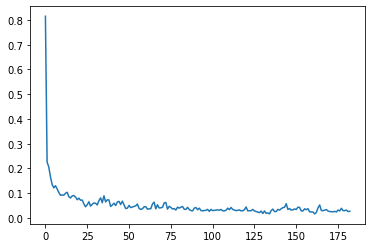

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)